<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Beautiful Soup - Nubes de Palabras  </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

In [84]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
nltk.download("all")

In [23]:
from nltk import word_tokenize

In [3]:
from urllib.request import urlopen

In [4]:
pagina=urlopen("https://urosario.edu.co/static/Maestria-en-MACC/Plan-de-estudios/#ECHTab4")
CodHTML=pagina.read().decode("utf-8")

In [5]:
CodHTML

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" >\r\n\r\n<!-- Mirrored from www.urosario.edu.co/Maestria-en-MACC/Plan-de-estudios/ by HTTrack Website Copier/3.x [XR&CO\'2014], Wed, 02 Nov 2022 01:18:11 GMT -->\r\n<!-- Added by HTTrack --><meta http-equiv="content-type" content="text/html;charset=utf-8" /><!-- /Added by HTTrack -->\r\n<head id="head"><title>\r\n\tMaestr&#237;a en Matem&#225;ticas Aplicadas y Ciencias de la Computaci&#243;n  - Universidad del Rosario\r\n</title><meta name="generator" content="Kentico 11.0 (build 11.0.7032) " /> \n<meta name="description" content="La Maestría en Matemáticas Aplicadas les permitirá profundizar sus conocimientos en matemáticas aplicadas y ciencias de la computación a través de 3 énfasis que responden a las necesidades de la Revolución 4.0: Ciencia de Datos Computacional, Ciberseguridad e Inteligencia Artificial." /> \n<me

In [13]:
# esta expresión regular deja solo texto y números
CodHTMLclean1=re.split('\W+',CodHTML)

In [15]:
len(CodHTMLclean1)

17456

In [ ]:
print(CodHTMLclean1[0:30])

Podemos usar la librería BeautifulSoup y limpiar el texto

In [17]:
# Para trabajar con info de páginas web
from bs4 import BeautifulSoup
CodHTMLclean = BeautifulSoup(CodHTML).get_text()


Veamos los 200 primeros carácteres

In [51]:
CodHTMLclean[0:200]

'\n\n\n\r\n\tMaestría en Matemáticas Aplicadas y Ciencias de la Computación  - Universidad del Rosario\r\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMaestría en Mat'

Vamos a usar la librería **NLTK** para tokenizar

In [ ]:
# tokenizador separa por espacios
tokens = nltk.word_tokenize(CodHTMLclean)
tokens[0:150]

Observación: *tokens* es una lista de palabras y por lo tanto no aplica la función *lower()*

In [ ]:
# cuidado: esto genera error
tokens.lower()

Debemos pasar a minúsculas antes de tokenizar. Es más fácil

In [53]:
CodHTMLclean =CodHTMLclean.lower()

In [ ]:
tokens = nltk.word_tokenize(CodHTMLclean)
tokens[0:150]

In [55]:
nltk.word_tokenize("fabian.? espera. @ el autobus!!")

['fabian.', '?', 'espera', '.', '@', 'el', 'autobus', '!', '!']

Veamos la cantidad de *tokens* que resultó de la página Web.

In [56]:
len(tokens)

4451

Podemos hacer la distribución de frecuencias por medio de la instrucción:

- ***Freq_dist_nltk***



In [57]:
Freq_dist_nltk=nltk.FreqDist(tokens)
Freq_dist_nltk

FreqDist({'de': 440, ',': 183, 'y': 151, '.': 118, 'el': 110, 'la': 108, 'en': 102, 'los': 69, 'se': 55, 'las': 51, ...})

Podemos gráficar el diccionario de frecuencias.

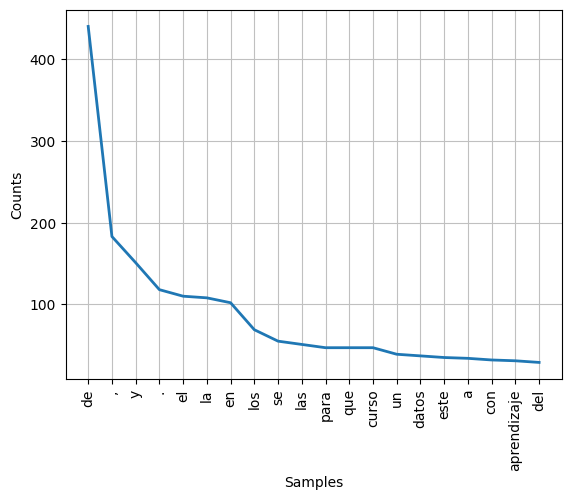

<Axes: xlabel='Samples', ylabel='Counts'>

In [58]:
# para hacer la gráfica de los primeros 20 registros del diccionario
Freq_dist_nltk.plot(20)

Ahora bien, eliminaremos las *stop-words* usando otra librería

In [59]:
!pip install stop-words

In [60]:
from stop_words import get_stop_words

In [ ]:
get_stop_words("es")

In [62]:
# palabras de parada en español
stop_words=get_stop_words("es")
print(stop_words[30:50])

['esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará']


Eliminaremos las *stop_words* anteriores.

In [71]:
# generar una nueva lista eliminado esas palabras de parada
tokens_clean=[palabras for palabras in tokens if len(palabras)>1 and (palabras not in stop_words)]

Exploremos un poco esta variable

In [ ]:
tokens_clean[0:100]

Ahora, calculamos de nuevo la tabla de frecuencias

In [76]:
Freq_dist_clean=nltk.FreqDist(tokens_clean)
Freq_dist_clean

FreqDist({'curso': 47, 'datos': 37, 'aprendizaje': 31, 'énfasis': 25, 'inteligencia': 23, 'cerrar': 23, 'sistemas': 22, 'maestrías': 20, 'análisis': 20, 'artificial': 19, ...})

De nuevo, la gráfica de frecuencias

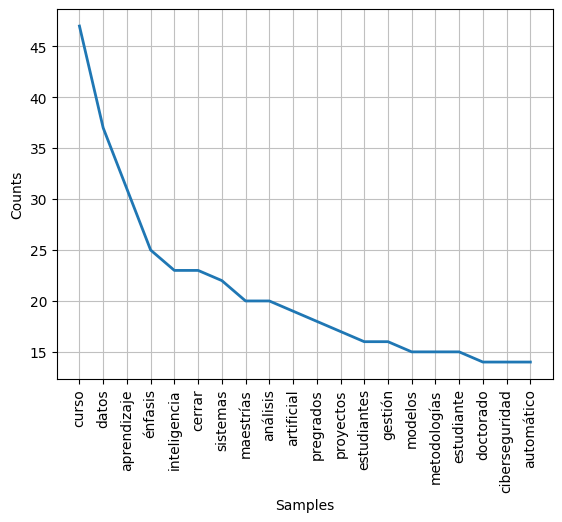

<Axes: xlabel='Samples', ylabel='Counts'>

In [77]:
Freq_dist_clean.plot(20)

Ahora, generamos la nube de palabras

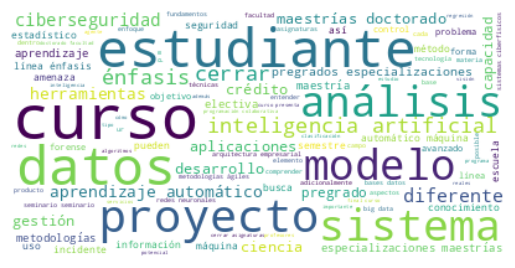

In [78]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(" ".join(tokens_clean))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

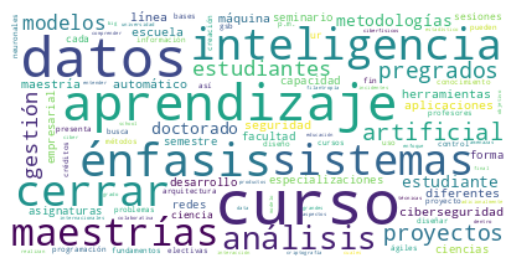

In [91]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate_from_frequencies(Freq_dist_clean)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Podemos guardar la imagen como

In [79]:
image = wordcloud.to_image()
image.save("nube.png")
image.show()

<FONT SIZE=5 COLOR="purple"> GENERACIÓN DE LA NUBE CON FORMA </FONT>

In [80]:
import PIL.Image
from IPython.display import display

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


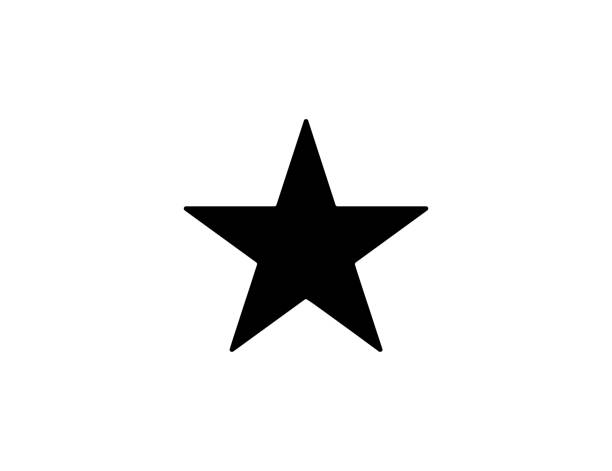

In [86]:
estrella = PIL.Image.open("/content/drive/MyDrive/1.2 PLN (2023-2)/Copia de FOTO.jpg")
display(estrella)

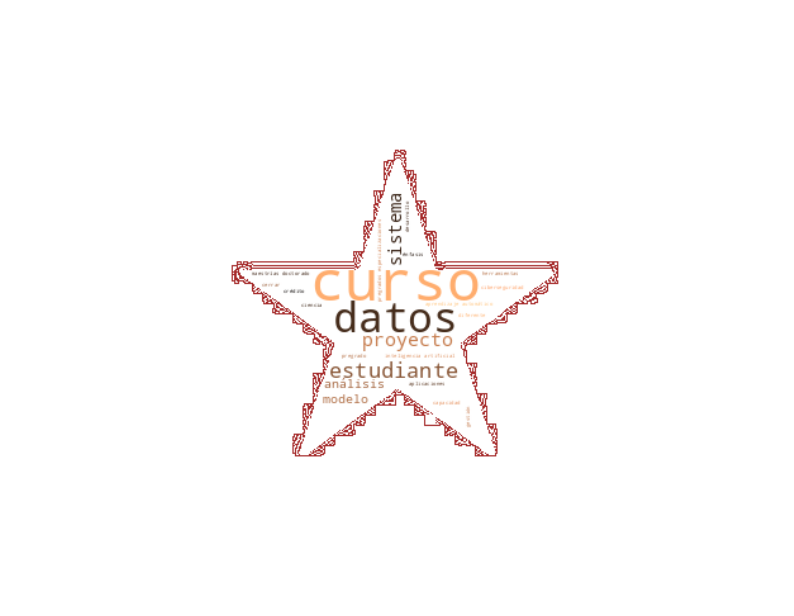

In [88]:
cruz_mask = np.array(estrella)

wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150,
                      max_words=100,
                      background_color='white',
                      colormap='copper_r',
                      stopwords=None,
                      mask=cruz_mask,
                      contour_width=0.5,
                      contour_color='brown').generate(" ".join(tokens_clean))

wordcloud.to_file("cruz_wordcloud.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()